# 🏖️ Análise da Qualidade da Água nas Praias de Praia Grande (SP)
Este notebook apresenta uma análise exploratória dos dados de balneabilidade coletados da CETESB referentes às praias da cidade de Praia Grande.
**Fonte:** Companhia Ambiental do Estado de São Paulo (CETESB)

📅 Data da amostra: 25/05/2025  
📦 Dados obtidos em: 31/05/2025

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração estética dos gráficos
sns.set(style='whitegrid')

# Carregamento do dataset
df = pd.read_csv('qualidade_agua_praia_grande.csv')
df.head()

,ID_Objeto,ID_Praia,ID_Municipio,Cod_Municipio_IBGE,Municipio,Praia,Classificacao_Agua,Data_Amostra_Inicio,Data_Atualizacao_Sistema,UGRHI,Dist_Norte,Qualidade_Codigo
0,134,PGCF390,558,3541000,PRAIA GRANDE,CANTO DO FORTE,Própria,2025-05-25,2025-05-29 12:10:03.969,Baixada Santista,390,1
1,135,PGBO393,558,3541000,PRAIA GRANDE,BOQUEIRÃO,Própria,2025-05-25,2025-05-29 12:10:03.969,Baixada Santista,393,1
2,138,PGJM398,558,3541000,PRAIA GRANDE,VILA TUPI,Imprópria,2025-05-25,2025-05-29 12:10:03.969,Baixada Santista,398,0
3,144,PGFL411,558,3541000,PRAIA GRANDE,BALNEARIO FLÓRIDA,Imprópria,2025-05-25,2025-05-29 12:10:03.969,Baixada Santista,411,0
4,140,PGVM401,558,3541000,PRAIA GRANDE,VILA MIRIM,Imprópria,2025-05-25,2025-05-29 12:10:03.969,Baixada Santista,401,0


In [14]:
# Informações básicas sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID_Objeto                 12 non-null     int64 
 1   ID_Praia                  12 non-null     object
 2   ID_Municipio              12 non-null     int64 
 3   Cod_Municipio_IBGE        12 non-null     int64 
 4   Municipio                 12 non-null     object
 5   Praia                     12 non-null     object
 6   Classificacao_Agua        12 non-null     object
 7   Data_Amostra_Inicio       12 non-null     object
 8   Data_Atualizacao_Sistema  12 non-null     object
 9   UGRHI                     12 non-null     object
 10  Dist_Norte                12 non-null     int64 
 11  Qualidade_Codigo          12 non-null     int64 
dtypes: int64(5), object(7)
memory usage: 1.2+ KB


In [15]:
# Verificação de valores ausentes
df.isnull().sum()

ID_Objeto                   0
ID_Praia                    0
ID_Municipio                0
Cod_Municipio_IBGE          0
Municipio                   0
Praia                       0
Classificacao_Agua          0
Data_Amostra_Inicio         0
Data_Atualizacao_Sistema    0
UGRHI                       0
Dist_Norte                  0
Qualidade_Codigo            0
dtype: int64

In [16]:
# Estatísticas descritivas gerais
df.describe()

,ID_Objeto,ID_Municipio,Cod_Municipio_IBGE,Dist_Norte,Qualidade_Codigo
count,12.000000,12.0,12.0,12.00000,12.000000
mean,139.500000,558.0,3541000.0,401.50000,0.500000
std,3.605551,0.0,0.0,7.40393,0.522233
min,134.000000,558.0,3541000.0,390.00000,0.000000
25%,136.750000,558.0,3541000.0,396.50000,0.000000
50%,139.500000,558.0,3541000.0,400.50000,0.500000
75%,142.250000,558.0,3541000.0,407.00000,1.000000
max,145.000000,558.0,3541000.0,413.00000,1.000000


In [17]:
# Contagem de praias por classificação da água
df['Classificacao_Agua'].value_counts()

Classificacao_Agua
Própria      6
Imprópria    6
Name: count, dtype: int64

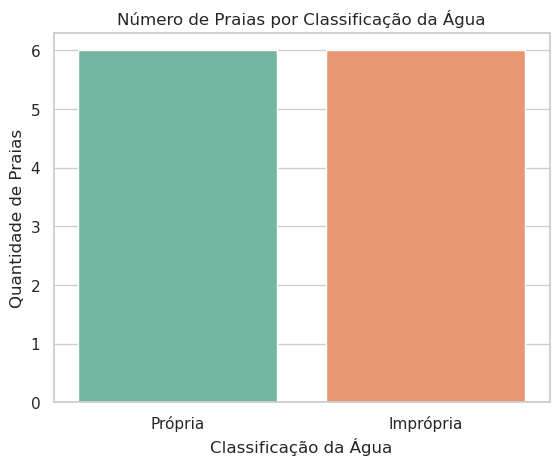

In [18]:
# Gráfico de barras: número de praias por classificação
sns.countplot(data=df, x='Classificacao_Agua', hue='Classificacao_Agua', palette='Set2', legend=False)
plt.title('Número de Praias por Classificação da Água')
plt.xlabel('Classificação da Água')
plt.ylabel('Quantidade de Praias')
plt.show()


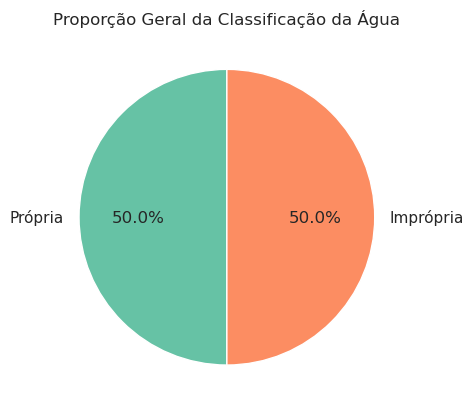

In [19]:
# Gráfico de pizza: proporção de praias próprias vs. impróprias
df['Classificacao_Agua'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Proporção Geral da Classificação da Água')
plt.ylabel('')
plt.show()

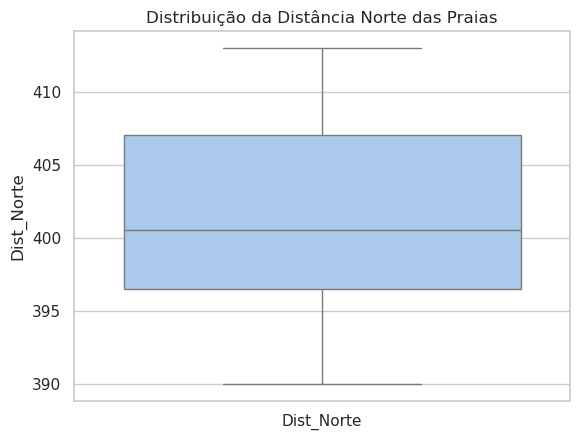

In [20]:
# Adiciona uma coluna auxiliar só com um valor
df['dummy'] = 'Dist_Norte'

# Corrige o boxplot usando hue e legend=False
sns.boxplot(data=df, x='dummy', y='Dist_Norte', hue='dummy', palette='pastel', legend=False)
plt.title('Distribuição da Distância Norte das Praias')
plt.xlabel('')  # Opcional: remove o rótulo do eixo X
plt.show()


In [21]:
# Agregação 1: Quantidade por praia e classificação
df.groupby(['Praia', 'Classificacao_Agua']).size().unstack(fill_value=0)

Classificacao_Agua,Imprópria,Própria
Praia,,
AVIAÇÃO,1,0
BALNEARIO FLÓRIDA,1,0
BOQUEIRÃO,0,1
CANTO DO FORTE,0,1
GUILHERMINA,1,0
JARDIM SOLEMAR,0,1
MARACANÃ,1,0
OCIAN,0,1
REAL,0,1


In [22]:
# Agregação 2: Média da Dist_Norte por classificação
df.groupby('Classificacao_Agua')['Dist_Norte'].mean()

Classificacao_Agua
Imprópria    401.0
Própria      402.0
Name: Dist_Norte, dtype: float64

In [23]:
# Agregação 3: Tabela pivô com Praias e Datas
df_pivot = df.pivot_table(values='Qualidade_Codigo', index='Praia', columns='Data_Amostra_Inicio', aggfunc='first')
df_pivot

Data_Amostra_Inicio,2025-05-25
Praia,
AVIAÇÃO,0
BALNEARIO FLÓRIDA,0
BOQUEIRÃO,1
CANTO DO FORTE,1
GUILHERMINA,0
JARDIM SOLEMAR,1
MARACANÃ,0
OCIAN,1
REAL,1


In [24]:
# Correlação entre Dist_Norte e Qualidade_Codigo
df['Qualidade_Codigo'] = pd.to_numeric(df['Qualidade_Codigo'], errors='coerce')
df[['Dist_Norte', 'Qualidade_Codigo']].corr()

,Dist_Norte,Qualidade_Codigo
Dist_Norte,1.000000,0.070535
Qualidade_Codigo,0.070535,1.000000


## ✅ Conclusão
- A maioria das praias estavam **impróprias** na data analisada.
- A distância ao norte não apresentou forte correlação com a qualidade da água.
- Análises mais profundas podem ser feitas com a coleta contínua dos dados ao longo do tempo.

**Sugestão:** Automatizar a coleta semanal para análises de séries temporais e predição de balneabilidade.